Download Your Data 
https://www.kaggle.com/ericmclachlan/jigsaw-toxic-comment-train-and-test

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from collections import Counter
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from collections import Counter
from imblearn.over_sampling import SMOTE

import warnings 
warnings.filterwarnings('ignore')


import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from bs4 import BeautifulSoup
import re,string,unicodedata



from sklearn.linear_model import LogisticRegression,SGDClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC

In [2]:
df= pd.read_csv(r'D:\B Drive\Data Science\Practice Data\Jigsaw Toxic Comment Train and Test\train.csv')
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


<h3> In this notebook our focus on whether a comment  is toxic or not so we need comment_text and toxic column.We select only two columns and drop others.</h3>

In [3]:
df= df[['comment_text','toxic']]
df


,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


In [4]:
df.shape

(159571, 2)

<AxesSubplot:xlabel='toxic', ylabel='count'>

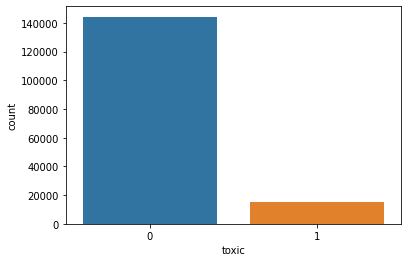

In [5]:
sns.countplot(df['toxic'])

In [6]:
df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

From above we can clearly see that our dataset is imbalanced dataset.We will later handle with it till then we will do data visualization after all first we need to understand our data

# Data Visualization

In [7]:
df['Number of words']= df['comment_text'].apply(lambda x:len(str(x).split()))
df

,comment_text,toxic,Number of words
0,Explanation\nWhy the edits made under my usern...,0,43
1,D'aww! He matches this background colour I'm s...,0,17
2,"Hey man, I'm really not trying to edit war. It...",0,42
3,"""\nMore\nI can't make any real suggestions on ...",0,113
4,"You, sir, are my hero. Any chance you remember...",0,13
...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,47
159567,You should be ashamed of yourself \n\nThat is ...,0,18
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,12
159569,And it looks like it was actually you who put ...,0,25


In [8]:
df.describe()

,toxic,Number of words
count,159571.000000,159571.000000
mean,0.095844,67.273527
std,0.294379,99.230702
min,0.000000,1.000000
25%,0.000000,17.000000
50%,0.000000,36.000000
75%,0.000000,75.000000
max,1.000000,1411.000000


From above we can see that we have maximum 1411 words in our sentence and average length is 67.The minimum words in sentence is 1,let's see what are those sentences and how many sentences are there

In [9]:
print('Number of sentences having one word are',len(df[df['Number of words']==1]))

Number of sentences having one word are 17


There are three ways to access column with specified condition on another column.

In [10]:
df[df['Number of words']==1]['comment_text']

19815                                (www.ebenefits.va.gov)
52442                                                14:53,
52475                     User_talk:Blackson#Religious_bias
53787                         92.24.199.233|92.24.199.233]]
55751                                   Complaints/Mistakes
64904     http://en.wikipedia.org/wiki/Wikipedia_talk:No...
76037     http://finance.yahoo.com/news/7-fascinating-nu...
93586                                          {{unblock|yo
105657    Talk:E%3DMC%C2%B2_(Mariah_Carey_album)#Concern...
106891         http://en.wikipedia.org/wiki/Wikipedia:ELYES
109985                                             {{unbloc
110293    Wikipedia:Administrators%27_noticeboard/Incide...
111438                                   |needs-infobox=yes
117663                                    (talk)/(contribs)
127744                                      User:Wipeouting
130194                        hyper_individualist@yahoo.com
141293    http://www.haaretz.com/news/di

In [11]:
df['comment_text'][df['Number of words']==1]

19815                                (www.ebenefits.va.gov)
52442                                                14:53,
52475                     User_talk:Blackson#Religious_bias
53787                         92.24.199.233|92.24.199.233]]
55751                                   Complaints/Mistakes
64904     http://en.wikipedia.org/wiki/Wikipedia_talk:No...
76037     http://finance.yahoo.com/news/7-fascinating-nu...
93586                                          {{unblock|yo
105657    Talk:E%3DMC%C2%B2_(Mariah_Carey_album)#Concern...
106891         http://en.wikipedia.org/wiki/Wikipedia:ELYES
109985                                             {{unbloc
110293    Wikipedia:Administrators%27_noticeboard/Incide...
111438                                   |needs-infobox=yes
117663                                    (talk)/(contribs)
127744                                      User:Wipeouting
130194                        hyper_individualist@yahoo.com
141293    http://www.haaretz.com/news/di

In [12]:
df.loc[df['Number of words']==1]['comment_text']

19815                                (www.ebenefits.va.gov)
52442                                                14:53,
52475                     User_talk:Blackson#Religious_bias
53787                         92.24.199.233|92.24.199.233]]
55751                                   Complaints/Mistakes
64904     http://en.wikipedia.org/wiki/Wikipedia_talk:No...
76037     http://finance.yahoo.com/news/7-fascinating-nu...
93586                                          {{unblock|yo
105657    Talk:E%3DMC%C2%B2_(Mariah_Carey_album)#Concern...
106891         http://en.wikipedia.org/wiki/Wikipedia:ELYES
109985                                             {{unbloc
110293    Wikipedia:Administrators%27_noticeboard/Incide...
111438                                   |needs-infobox=yes
117663                                    (talk)/(contribs)
127744                                      User:Wipeouting
130194                        hyper_individualist@yahoo.com
141293    http://www.haaretz.com/news/di

So basically there are link,random words and numbers, so there are no one word sentence having some meaning

Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

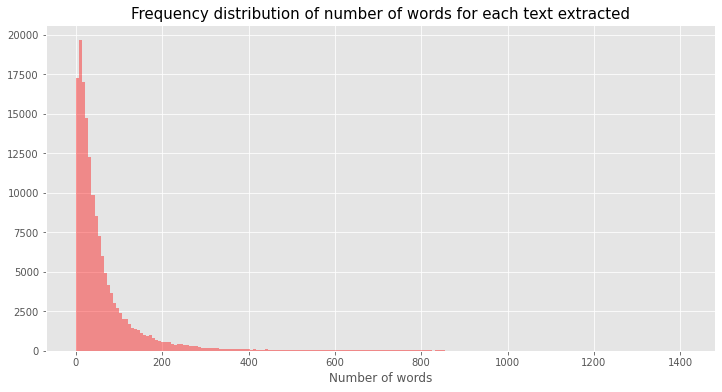

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(df['Number of words'],kde = False,color="red",bins=200)
plt.title("Frequency distribution of number of words for each text extracted", size=15)

Now let's see toxic and non-toxic comments

In [14]:
#Toxic Comment
toxic_comm= df[df['toxic']==1]['comment_text']
toxic_comm.reset_index(inplace=True,drop= True)

for i in range(5):
    print(toxic_comm[i])
    

COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...
Bye! 

Don't look, come or think of comming back! Tosser.
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in 

In [15]:
#Non-toxic Comment
Ntoxic_comm= df[df['toxic']==0]['comment_text']
Ntoxic_comm.reset_index(inplace=True,drop= True)

for i in range(5):
    print(Ntoxic_comm[i])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want 

Number of characters in sentence

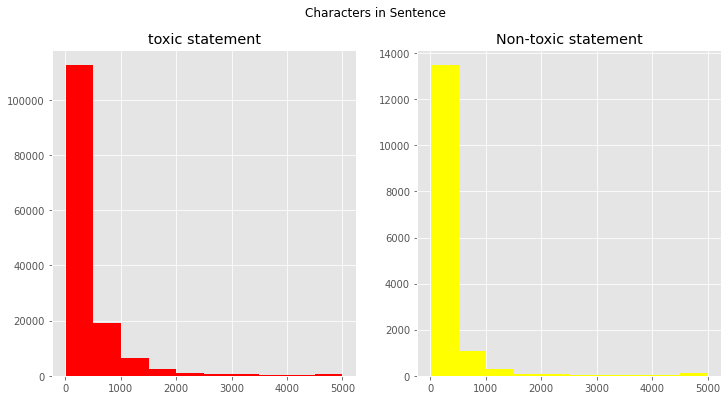

In [16]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize =(12,6))

toxic_len= df[df['toxic']==0]['comment_text'].str.len()
Ntoxic_len= df[df['toxic']==1]['comment_text'].str.len()

ax1.hist(toxic_len,color='Red')
ax1.set_title('toxic statement')

ax2.hist(Ntoxic_len, color= "yellow")
ax2.set_title('Non-toxic statement')

fig.suptitle('Characters in Sentence')
plt.show()

Number of words in each text

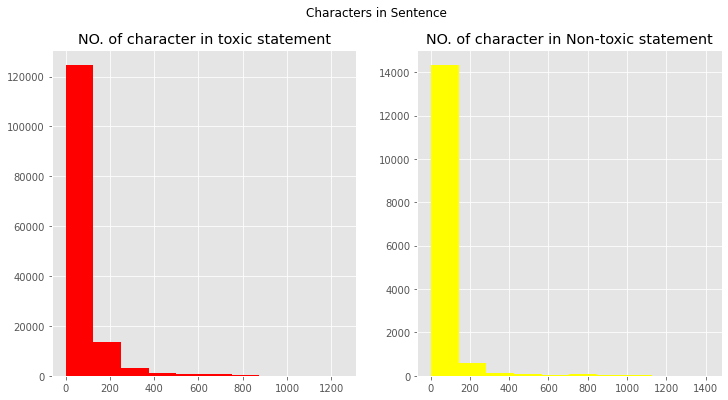

In [17]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize =(12,6))

toxic_len= df[df['toxic']==0]['comment_text'].str.split().map(lambda x: len(x))
Ntoxic_len= df[df['toxic']==1]['comment_text'].str.split().map(lambda x: len(x))

ax1.hist(toxic_len,color='Red')
ax1.set_title('NO. of character in toxic statement')

ax2.hist(Ntoxic_len, color= "yellow")
ax2.set_title('NO. of character in Non-toxic statement')

fig.suptitle('Characters in Sentence')
plt.show()

<h4>Tri-gram</h4>

In [18]:
#Toxic
toxic_text = ' '.join(df.loc[df.toxic == 1]['comment_text'].values)
toxic_text
toxic_text_trigrams= [i for i in ngrams(toxic_text.split(),3)]
Counter(toxic_text_trigrams).most_common(30)

[(('NIGGER', 'NIGGER', 'NIGGER'), 1876),
 (('hi', 'moron', 'hi'), 1468),
 (('moron', 'hi', 'moron'), 1466),
 (('PIG', 'PIG', 'PIG'), 1248),
 (('FAT', 'JEW', 'FAT'), 1226),
 (('JEW', 'FAT', 'JEW'), 1224),
 (('Bark', 'Bark', 'Bark'), 998),
 (('SHIT', 'SHIT', 'SHIT'), 998),
 (('WANKER', 'WANKER', 'WANKER'), 940),
 (('BALLS', 'BALLS', 'BALLS'), 831),
 (('Go', 'fuck', 'yourself!'), 822),
 (('fuck', 'yourself!', 'Go'), 817),
 (('yourself!', 'Go', 'fuck'), 817),
 (('YOU', 'SUCK', 'YOU'), 730),
 (('SUCK', 'YOU', 'SUCK'), 729),
 (('faggot', 'faggot', 'faggot'), 711),
 (('Nipple', 'Nipple', 'Nipple'), 707),
 (('ass.', 'I', 'ass.'), 677),
 (('I', 'ass.', 'I'), 676),
 (('DIE', 'FAG', 'DIE'), 624),
 (('FAG', 'DIE', 'FAG'), 624),
 (('faggots', 'faggots', 'faggots'), 623),
 (('fucksex', 'fucksex', 'fucksex'), 622),
 (('fuck', 'yourselfgo', 'fuck'), 621),
 (('your', 'a', 'dickhead'), 620),
 (('a', 'dickhead', 'your'), 619),
 (('dickhead', 'your', 'a'), 619),
 (('yourselfgo', 'fuck', 'yourselfgo'), 619

In [19]:
#Non-Toxic
Ntoxic_text = ' '.join(df.loc[df.toxic == 0]['comment_text'].values)
Ntoxic_text
Ntoxic_text_trigrams= [i for i in ngrams(Ntoxic_text.split(),3)]
Counter(Ntoxic_text_trigrams).most_common(30)

[(('Thank', 'you', 'for'), 3091),
 (('would', 'like', 'to'), 2866),
 (('Please', 'do', 'not'), 2798),
 (('is', 'not', 'a'), 2503),
 (('one', 'of', 'the'), 2465),
 (('If', 'you', 'have'), 2263),
 (('on', 'my', 'talk'), 2252),
 (('you', 'want', 'to'), 2235),
 (('I', 'hope', 'you'), 2136),
 (('you', 'will', 'be'), 2106),
 (('be', 'blocked', 'from'), 2057),
 (('you', 'have', 'any'), 2047),
 (('a', 'lot', 'of'), 1982),
 (('you', 'for', 'your'), 1957),
 (('I', 'am', 'not'), 1935),
 (('you', 'continue', 'to'), 1909),
 (('will', 'be', 'blocked'), 1865),
 (('there', 'is', 'no'), 1860),
 (('to', 'be', 'a'), 1820),
 (('If', 'you', 'continue'), 1819),
 (('look', 'at', 'the'), 1731),
 (('the', 'fact', 'that'), 1724),
 (('I', 'do', 'not'), 1668),
 (('a', 'look', 'at'), 1662),
 (('to', 'the', 'article'), 1627),
 (('as', 'well', 'as'), 1615),
 (('you', 'would', 'like'), 1610),
 (('there', 'is', 'a'), 1574),
 (('part', 'of', 'the'), 1534),
 (('of', 'the', 'article'), 1523)]

# Wordcloud

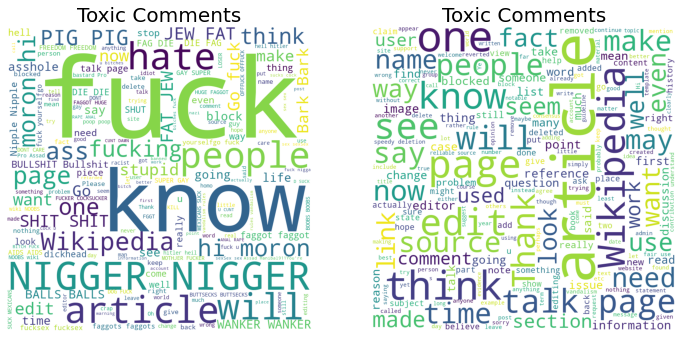

In [20]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize= (12,10))
wordcloud1 = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(" ".join(toxic_comm))
wordcloud2 = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(" ".join(Ntoxic_comm))
# plot the WordCloud image                       

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Toxic Comments',fontsize=20)

ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Toxic Comments',fontsize=20);
plt.show()

# Data Cleaning

It's time to clean our dataset

In [21]:
# import string library function
import string

# Storing the sets of punctuation in variable result
result = string.punctuation

# Printing the punctuation values
print(result)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [29]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)


In [33]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['comment_text']=df['comment_text'].apply(denoise_text)



Let's see our cleaned data

In [40]:
print('original data :','\n', Ntoxic_comm[0])
print('*' *20)
print('cleaned data :','\n',  df['comment_text'][0])

original data : 
 Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
********************
cleaned data : 
 explanation edits made username hardcore metallica fan closure gas voted new york dolls please remove template talk page since retired


# ML Model

In [51]:
#Independent variable and dependent variable

X= df['comment_text']
y= df['toxic']

In [52]:
cv = CountVectorizer()
X= cv.fit_transform(X)


As we saw earlier our data is imbalanced, first we balanced it using SMOTE technique.Oversampling it and we balanced the data.

In [53]:
smote= SMOTE()

x_smote,y_smote= smote.fit_resample(X,y)


In [54]:
Counter(y_smote)

Counter({0: 144277, 1: 144277})

<AxesSubplot:xlabel='toxic', ylabel='count'>

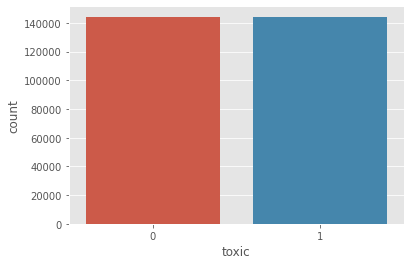

In [55]:
sns.countplot(y_smote)

In [56]:
#split data into train-test in 70:30
x_train,x_test,y_train,y_test= train_test_split(x_smote,y_smote, test_size= 0.3, random_state= 0)


# Logistic Regression

In [58]:
lr= LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [65]:
# Predicting the Test set results
y_pred_lr=lr.predict(x_test)

In [66]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     43277
           1       0.87      0.96      0.92     43290

    accuracy                           0.91     86567
   macro avg       0.92      0.91      0.91     86567
weighted avg       0.92      0.91      0.91     86567



In [67]:
score = accuracy_score(y_test,y_pred)
print(score)

0.9117331084593436


# Naive Bayes

In [68]:
NB= MultinomialNB()
NB.fit(x_train,y_train)

MultinomialNB()

In [71]:
# Predicting the Test set results
y_pred_nb = NB.predict(x_test)

In [72]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.72      0.96      0.82     43277
           1       0.95      0.63      0.75     43290

    accuracy                           0.79     86567
   macro avg       0.83      0.80      0.79     86567
weighted avg       0.83      0.79      0.79     86567



In [73]:
score = accuracy_score(y_test,y_pred_nb)
print(score)

0.7949911629142745


# XgbClassifier

In [75]:
clf = XGBClassifier()
clf.fit(x_train, y_train)

[22:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
# Predicting the Test set results
y_pred_xg = clf.predict(x_test)

In [79]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     43277
           1       0.99      0.86      0.92     43290

    accuracy                           0.93     86567
   macro avg       0.93      0.93      0.92     86567
weighted avg       0.93      0.93      0.92     86567



In [80]:
score = accuracy_score(y_test,y_pred_xg)
print(score)

0.9252602030796955
